In [44]:
import pandas as pd 
#Now we only look at the instances that Greedy Solved. 
greedy_instances = pd.read_csv('greedy_consistent_solved_instances.csv')
selected_instances = greedy_instances.loc[greedy_instances.solved==1].instance_id
print(len(selected_instances))

1173


Consistent Greedy solved 1173 out of 3000 instances

# Generate DF with [greedy_actions]

In [45]:
filename = 'data_consistent_greedy_paper.csv'

In [46]:
data = pd.read_csv(filename)
data = data.loc[data.instance_id.isin(selected_instances)][['instance_id', 'step', 'strtype', 'action']].copy()

count = 0
for instanceid in data.instance_id.unique():
    select_ = data.loc[data.instance_id == instanceid].sort('step').reset_index(drop = True).copy()   
    if count == 0:
        new_data = select_.copy()
    else: 
        new_data = new_data.append(select_)
   
    count = count + 1

/Users/evertjanpeer/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [47]:
new_data = new_data.reset_index(drop=True)
new_data.loc[new_data.step==8]

,instance_id,step,strtype,action
8,5006,8,"['16', '14']",1
17,5011,8,['14'],7
26,5013,8,"['14', '14']",7
35,5015,8,"['24', '26']",1
44,5016,8,['16'],4
53,5019,8,"['14', '14']",9
62,5021,8,"['24', '24']",4
71,5023,8,['14'],6
80,5024,8,"['24', '24']",1
89,5026,8,"['24', '24']",4


In [48]:
len(new_data.instance_id.unique())

1173

# now look at entropy measure

In [49]:
import scipy.stats as sc

# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

records = []
for type_ in new_data.strtype.unique():
    for step in new_data.step.unique():
        slice_ = new_data.loc[new_data.strtype == type_].loc[new_data.step == step].copy()
        actions_greedy = slice_.action
        ent_greedy = ent(actions_greedy)

        records.append({'type_': type_, 'step': step, 'ent_greedy': ent_greedy})

In [50]:
ent_data = pd.DataFrame.from_records(records)
ent_data['composition'] = ent_data.apply(lambda row: row.type_.replace('14','SLT4').replace('16', 'SLT6').replace('24','VIRM4').replace('26','VIRM6'), axis =1 )

ent_data.head(100)

,ent_greedy,step,type_,composition
0,0.000000,0,"['24', '26']","['VIRM4', 'VIRM6']"
1,0.000000,1,"['24', '26']","['VIRM4', 'VIRM6']"
2,0.460732,2,"['24', '26']","['VIRM4', 'VIRM6']"
3,0.687478,3,"['24', '26']","['VIRM4', 'VIRM6']"
4,0.889440,4,"['24', '26']","['VIRM4', 'VIRM6']"
5,0.797162,5,"['24', '26']","['VIRM4', 'VIRM6']"
6,0.903964,6,"['24', '26']","['VIRM4', 'VIRM6']"
7,1.032597,7,"['24', '26']","['VIRM4', 'VIRM6']"
8,0.966675,8,"['24', '26']","['VIRM4', 'VIRM6']"
9,0.314492,9,"['24', '26']","['VIRM4', 'VIRM6']"


/Users/evertjanpeer/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


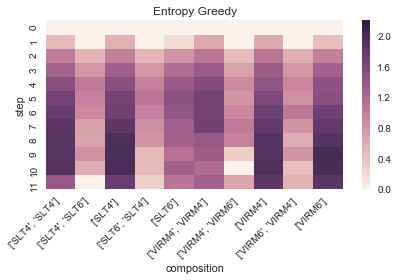

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

%matplotlib inline  

max_ = 2.20 #max(max(ent_data.ent_ej), max(ent_data.ent_roel), max(ent_data.ent_random))
min_ = 0 #min(min(ent_data.ent_ej), min(ent_data.ent_roel), min(ent_data.ent_random))

#entropies Greedy
plt.figure()
sns.heatmap(ent_data.pivot(index='step', columns='composition', values='ent_greedy'), vmin=min_, vmax=max_).set_title('Entropy Greedy')
plt.xticks(rotation=45, ha='right')
sns.plt.savefig('entropy_consistent_greedy.eps')


# entropies on train type level

In [52]:
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

records = []
for type_ in new_data.strtype.unique():
    actions_greedy = new_data.loc[new_data.strtype == type_].action.copy()
    ent_greedy = ent(actions_greedy)

    records.append({'type_': type_, 'algo': 'Greedy', 'ent': ent_greedy})
    
ent_data = pd.DataFrame.from_records(records)
ent_data['composition'] = ent_data.apply(lambda row: row.type_.replace('14','SLT4').replace('16', 'SLT6').replace('24','VIRM4').replace('26','VIRM6'), axis =1 )
ent_data.head()

,algo,ent,type_,composition
0,Greedy,1.776110,"['24', '26']","['VIRM4', 'VIRM6']"
1,Greedy,1.846545,"['14', '14']","['SLT4', 'SLT4']"
2,Greedy,1.861176,"['24', '24']","['VIRM4', 'VIRM4']"
3,Greedy,1.922490,['26'],['VIRM6']
4,Greedy,1.940364,['16'],['SLT6']


In [53]:
ent_data

,algo,ent,type_,composition
0,Greedy,1.776110,"['24', '26']","['VIRM4', 'VIRM6']"
1,Greedy,1.846545,"['14', '14']","['SLT4', 'SLT4']"
2,Greedy,1.861176,"['24', '24']","['VIRM4', 'VIRM4']"
3,Greedy,1.922490,['26'],['VIRM6']
4,Greedy,1.940364,['16'],['SLT6']
5,Greedy,1.800910,['24'],['VIRM4']
6,Greedy,1.816663,['14'],['SLT4']
7,Greedy,1.753039,"['16', '14']","['SLT6', 'SLT4']"
8,Greedy,1.781201,"['14', '16']","['SLT4', 'SLT6']"
9,Greedy,1.756846,"['26', '24']","['VIRM6', 'VIRM4']"


In [54]:
result_table = ent_data.pivot(index='algo', columns='composition', values='ent').round(2)

In [55]:
result_table.to_latex()

"\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\ncomposition &  ['SLT4', 'SLT4'] &  ['SLT4', 'SLT6'] &  ['SLT4'] &  ['SLT6', 'SLT4'] &  ['SLT6'] &  ['VIRM4', 'VIRM4'] &  ['VIRM4', 'VIRM6'] &  ['VIRM4'] &  ['VIRM6', 'VIRM4'] &  ['VIRM6'] \\\\\nalgo   &                   &                   &           &                   &           &                     &                     &            &                     &            \\\\\n\\midrule\nGreedy &              1.85 &              1.78 &      1.82 &              1.75 &      1.94 &                1.86 &                1.78 &        1.8 &                1.76 &       1.92 \\\\\n\\bottomrule\n\\end{tabular}\n"

In [56]:
result_table

composition,"['SLT4', 'SLT4']","['SLT4', 'SLT6']",['SLT4'],"['SLT6', 'SLT4']",['SLT6'],"['VIRM4', 'VIRM4']","['VIRM4', 'VIRM6']",['VIRM4'],"['VIRM6', 'VIRM4']",['VIRM6']
algo,,,,,,,,,,
Greedy,1.85,1.78,1.82,1.75,1.94,1.86,1.78,1.8,1.76,1.92
